In [27]:
import numpy as np
import pandas as pd
import glob as gb
import os
import re
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib notebook

# Plot Spectrums

In [25]:
def sort_files(files):
    fname = [os.path.split(f)[1] for f in files]
    fname = [os.path.splitext(f)[0][:-1] for f in fname]  # Remove .txt and K
    return fname

In [56]:
files = gb.glob('./Spectrum/*K.txt')
files = sorted(files, key=sort_files)

# Colorbar
NUM_COLORS = len(files)
cm = plt.get_cmap('rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

<IPython.core.display.Javascript object>


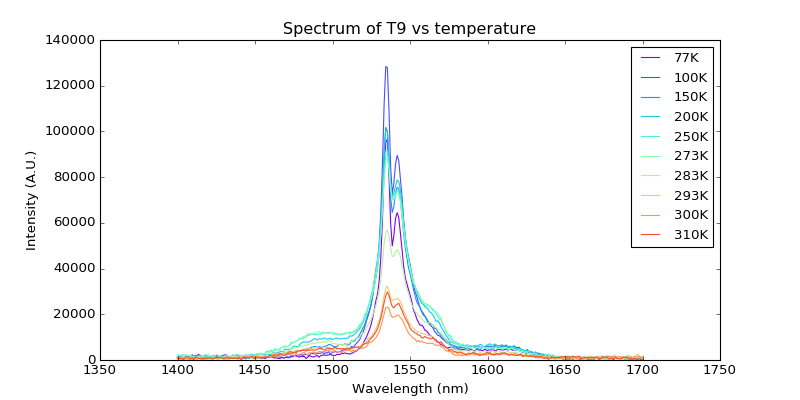

C:\Users\mn14tm\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [63]:
# Plot data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

for f in files:
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22)
    wavelength = spectrumData[:, 0]
    intensity = spectrumData[:, 1]
    
    intensity -= min(intensity)
#     intensity /= max(intensity)
    
    fname = os.path.split(f)[1]
    fname = os.path.splitext(fname)[0]  # Remove .txt and K
    ax.plot(wavelength, intensity, label=fname)

plt.legend(prop={'size': 12}, ncol=1)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (A.U.)')
plt.title('Spectrum of T9 vs temperature')
fig.savefig('spectrum.png', dpi=300)

# Plot Lifetimes

In [65]:
# Lifetime function
from scipy.optimize import curve_fit

def model_func(t, a, b, c):
        return a*np.exp(-t/b)+c

def getLifetime(time, intensity):
    guess = [max(intensity), 10, min(intensity)]
    popt, pcov = curve_fit(model_func, time, intensity, guess)
    return popt[1]

def sort_files(files):
    fname = [os.path.split(f)[1] for f in files]
    fname = [os.path.splitext(f)[0][:-1] for f in fname]  # Remove .txt and K
    fname = fname[4:]
    return fname

## Lifetime at 100us

In [68]:
files = gb.glob('./Lifetime/100us*.txt')
files = sorted(files, key=sort_files)

<IPython.core.display.Javascript object>


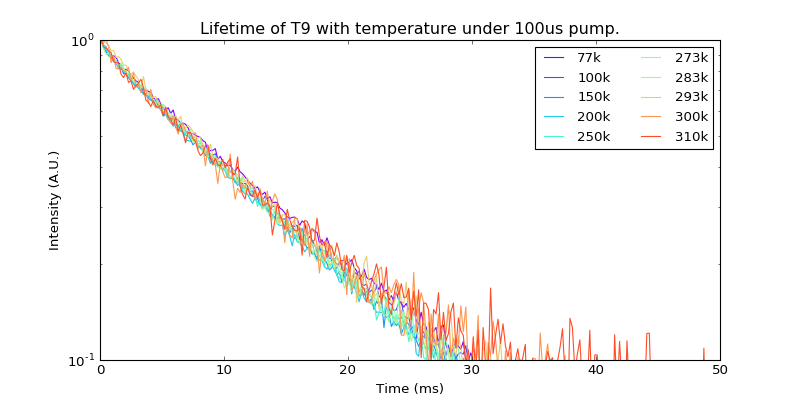

C:\Users\mn14tm\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [107]:
# Plot data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
NUM_COLORS = len(files)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

tau = []; temp = [];
for f in files:
    
    # load data
    data = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=10)
    time = data[:,0]/1E6
    intensity = data[:,1]
    
    # Shift time axis to account for the pump
    time -= 0.1

    # Drop the data before the pump - *!required for lifetime fitting*!
    ind = np.where(time>=0)
    time = time[ind]
    intensity = intensity[ind]
    
        # Normalise
    intensity -= min(intensity)
    intensity /= max(intensity)
    
    fname = os.path.split(f)[1]
    fname = os.path.splitext(fname)[0]  
    fname = fname[6:] # Remove .txt and K
    
#     if  fname in ['77k', '310k']:
    ax.plot(time, intensity, label=fname)
    
    tau.append(getLifetime(time, intensity))
    temp.append(fname[:-1])

ax.set_yscale('log')
plt.ylim(0.1, 1)
plt.xlim(0,50)
plt.legend(prop={'size': 12}, ncol=2)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.title('Lifetime of T9 with temperature under 100us pump.')
fig.savefig('lifetime_normalise.png', dpi=300)
plt.show()

# Plot Lifetimes

77		12.285
100		11.992
150		11.410
200		11.130
250		11.181
273		11.115
283		11.109
293		10.843
300		10.677
310		10.653


<IPython.core.display.Javascript object>


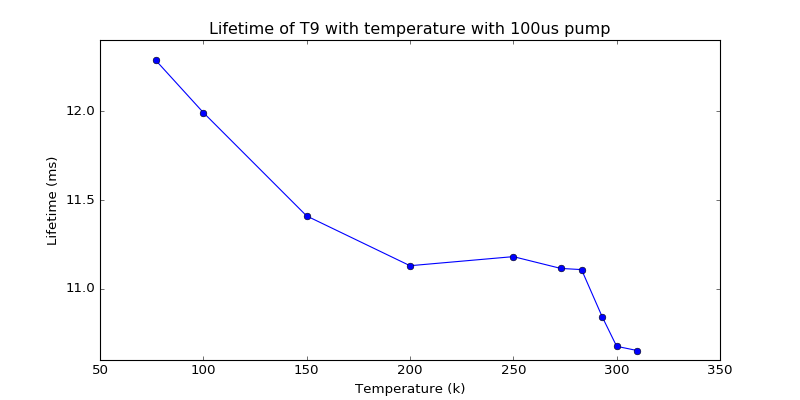

In [90]:
for x,y in zip(temp,tau):
    print('%s\t\t%.3f' % (x,y))

plt.figure(figsize=(10.0,5.0))
plt.plot(temp, tau, '-o')
plt.xlabel('Temperature (k)')
plt.ylabel('Lifetime (ms)')
plt.title('Lifetime of T9 with temperature with 100us pump')
fig.savefig('tau_vs_temp.png', dpi=300)

### Lifetime at 2ms pump

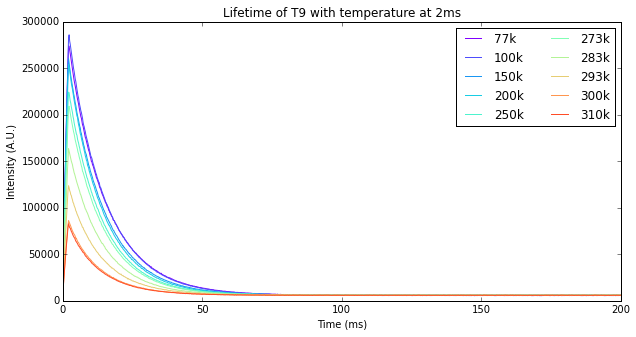

In [28]:
files = gb.glob('2ms*.txt')
files = sorted(files, key=lambda x: int(x[4:-5]))

# for f in files:
#     print(f)
    
# Plot data
fig = plt.figure()
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
NUM_COLORS = len(files)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

for f in files:
    decayData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=10)
    time = decayData[:,0]/1E6
    intensity = decayData[:,1]
    ax.plot(time, intensity, label=f[4:-4])

plt.legend(prop={'size': 12}, ncol=2)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.title('Lifetime of T9 with temperature at %s' % f[:3])
# fig.savefig('lifetime.png')
plt.show()

Temp (k)		Lifetime
77		13.482
100		13.125
150		12.574
200		12.165
250		12.071
273		11.943
283		11.690
293		11.361
300		11.152
310		11.135


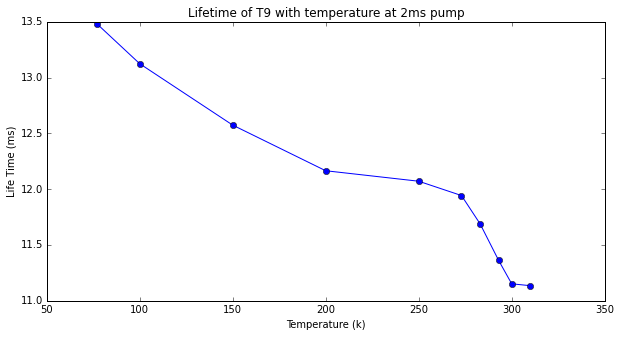

In [29]:
# Plot Lifetimes
pump = 2  # ms
a = int(pump/0.2)
print('Temp (k)\t\tLifetime')
tau2 = []; temp = [];
for f in files:
    decayData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=10)
    time = decayData[a:,0]/1E6
    intensity = decayData[a:,1]
    tau2.append(getLifetime(time, intensity))
    temp.append(re.split('_|k',f)[1])

for x,y in zip(temp,tau2):
    print('%s\t\t%.3f' % (x,y))

plt.figure(figsize=(10.0,5.0))
plt.plot(temp, tau2, '-o')
plt.xlabel('Temperature (k)')
plt.ylabel('Life Time (ms)')
plt.title('Lifetime of T9 with temperature at %s pump' % f[:3])

## Lifetime at 65ms pump

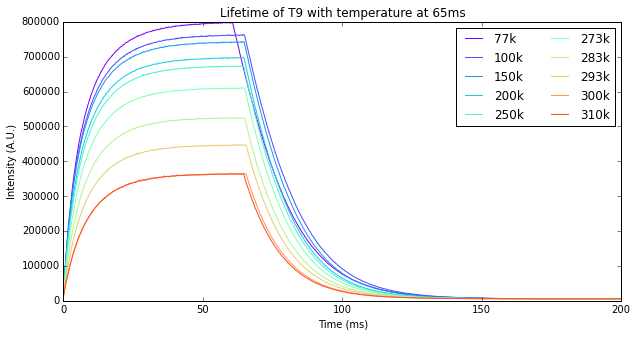

In [31]:
files = gb.glob('65ms*.txt')
files = sorted(files, key=lambda x: int(x[5:-5]))
# for f in files:
#     print(f)

# Plot data
fig = plt.figure()
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
NUM_COLORS = len(files)
ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

for f in files:
    decayData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=10)
    time = decayData[:,0]/1E6
    intensity = decayData[:,1]
    ax.plot(time, intensity, label=f[5:-4])

plt.legend(prop={'size': 12}, ncol=2)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.title('Lifetime of T9 with temperature at %s' % f[:4])
# fig.savefig('lifetime.png')
plt.show()

Temp (k)		Lifetime
77		16.415
100		16.837
150		15.965
200		15.072
250		14.766
273		14.219
283		13.620
293		13.245
300		12.753
310		12.633


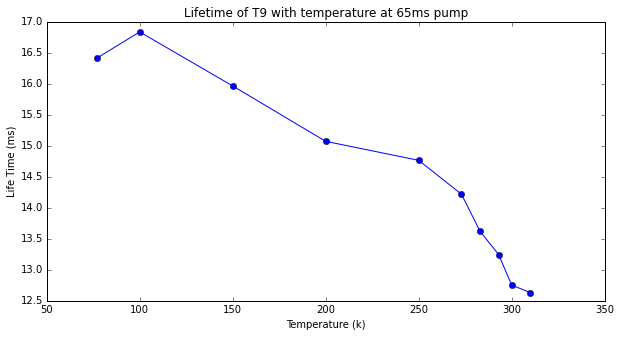

In [33]:
# Plot Lifetimes
print('Temp (k)\t\tLifetime')
tau3 = []; temp = [];
pump = 65  # ms
a = int(pump/0.2)
for f in files:
    decayData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=10)
    time = decayData[a:,0]/1E6
    intensity = decayData[a:,1]
    tau3.append(getLifetime(time, intensity))
    temp.append(re.split('_|k',f)[1])

for x,y in zip(temp,tau3):
    print('%s\t\t%.3f' % (x,y))

plt.figure(figsize=(10.0,5.0))
plt.plot(temp, tau3, '-o')
plt.xlabel('Temperature (k)')
plt.ylabel('Life Time (ms)')
plt.title('Lifetime of T9 with temperature at %s pump' % f[:4])

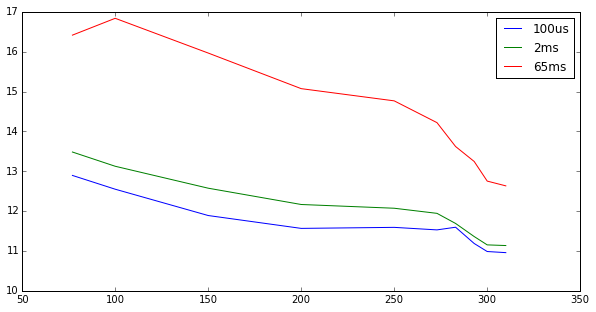

In [35]:
plt.figure(figsize=(10.0,5.0))
plt.plot(temp,tau,temp,tau2,temp,tau3)
plt.legend(('100us','2ms','65ms'))

In [12]:
# Load into dataframe
# df = pd.DataFrame({'Intensity':intensity}, index=time)
# df.head(5)